In [6]:
import numpy as np
from sklearn import datasets
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
df_wine.columns = ['Class label', 
                   'Alcohol', 
                   'Malic acid', 
                   'Ash',
                   'Alcanlinity of Ash', 
                   'Magnesium',
                   'Total phenols',
                   'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 
                   'Hue',
                   '0D280/0D315 of diluted wines',
                   'proline']
df_wine


,Class label,Alcohol,Malic acid,Ash,Alcanlinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


위 데이터셋을 훈련 데이터셋과, 테스트 데이터셋으로 나누는것이 이번 장의 목표.

In [8]:
from sklearn.model_selection import train_test_split

# X는 두번째부터 마지막 모든 열(13개)
# y는 데이터프레임에서 가장 첫번째 열(1개)
X, y = df_wine.iloc[:, 1:].values , df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.3, # test는 전체의 30%
                                                    random_state=0, 
                                                    stratify=y)

특성 스케일 맞추기
예외로, 결정트리와, 랜덤포레스트는 특성 스케일에 영향을 받지 않는다. 그 작동방식의 의사결정 방법이 데이터 분포에 대한 판단이기 때문이다.

특성 스케일이란 단순히, 그 특성의 값의 크기이다.
예를들어, 어떤 레이블에 대해 특성 x1 의값이 0~10, x2의값이 0~100000이라 하자. 그럼 오차제곱함수에서는 x2의 값에 의한 영향이 크게 끼쳐 가중치를 업데이트 할것이다. 그렇다면 어떻게 이 문제를 해결할까? -> 바로 스케일 특성 맞추기이다.

특성 스케일 맞추기
1. 정규화 : (문맥에 의미가 다르지만 대두분의 경우 데이터를 0~1 범위에 맞추는것으로 이해한다.)
2. 표준화 : 평균=0, 표준편차=1로 근사하게 맞추어서, 정규 분포와 같은 특징을 가지게한다.
3. 최대-최소 스케일 변환 (정해진 값이 필요할때 유용하다.)

아래 이외에도 사이킷런에는 이 외에도 RobustScaler, MaxAbsScaler 등이 있으니 필요할때 찾아 써보자.

In [9]:
from sklearn.preprocessing import MinMaxScaler

# 최대-최소 스케일 변환
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

In [10]:
from sklearn.preprocessing import StandardScaler
# 표준화
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

과대적합 방지 
'규제' 
'차원축소'

L2 -> 가중치합 제곱     : 희소 특성벡터를 잘 만들지 않는다.
L1 -> 가중치합 절대값   :희소 특성벡터를 보통 만든다.

In [13]:
from sklearn.linear_model import LogisticRegression
# L1 규제 를 이용해서 로지스틱회귀법 적용
# C는 규제편수 하이퍼 파라매터의 역수. 즉 C가 증가하면, 규제 약화.   C가 감소하면, 규제 강화
lr = LogisticRegression(solver='liblinear', penalty='l1', C=1.0, random_state=1) 
lr.fit(X_train_std, y_train)
print('훈련 정확도', lr.score(X_train_std, y_train))
print('테스트 정확도', lr.score(X_test_std, y_test))
lr.intercept_
# y 레이블의 클래쓰는 1, 2, 3 총 3개다. lr.intercept_의 결과값은 결정경계의 절편이다.
# 첫번째 값 -1.27211565는 1과 2,3을 구별하는 절편, 두번째 값 -1.4608331는 2와 1,3을 구별하는 절편, -2.24873996는 1,2를 구별하는 절편이다.

훈련 정확도 1.0
테스트 정확도 0.9629629629629629


array([-1.27211565, -1.4608331 , -2.24873996])

In [14]:
lr.coef_
# 각 클래쓰 마다의 가중치 배열이다. 레이블의 클래쓰는 3개이고, 특성은 13개니깐, 3x13 가중치 배열이 보여지는것이다.

array([[ 1.05165039,  0.30333785,  0.17397296, -0.64367937,  0.        ,
         0.        ,  1.17074117,  0.        ,  0.        ,  0.        ,
         0.        ,  0.69791551,  3.13073516],
       [-1.08509984, -0.57708573, -0.45739233,  0.08531024, -0.13616112,
         0.05264448,  0.58218438,  0.        ,  0.13250905, -1.9870342 ,
         0.91331761,  0.        , -2.98949936],
       [ 0.1629771 ,  0.11430892,  0.34185247,  0.        ,  0.        ,
         0.        , -2.55540508,  0.        ,  0.        ,  1.58007897,
        -0.90064928, -0.39893884,  0.        ]])

모델의 복잡도줄이고, 과대적합 방지하는법 > 차원축소

차원축소 주요카테고리
    특성 선택
        순차 특성 선택 - 탐욕적 탐색 알고리즘(greed search algorithm)으로 초기 d차원의 특성공간을 k < d인 k 차원 공간으로 축소하준다.
                        선택 알고리즘은 순차 후진 선택(Sequential Backward Selection, SBS)이다.
                        SBS: 새로운 특성의 부분공간이 목표하는 특성개수가 될때까지 전체특성에서 순차적으로 특성제거한다.
                        초기 특성의 부분 공간으로 차원을 축소한다.
                        
    특성 추출

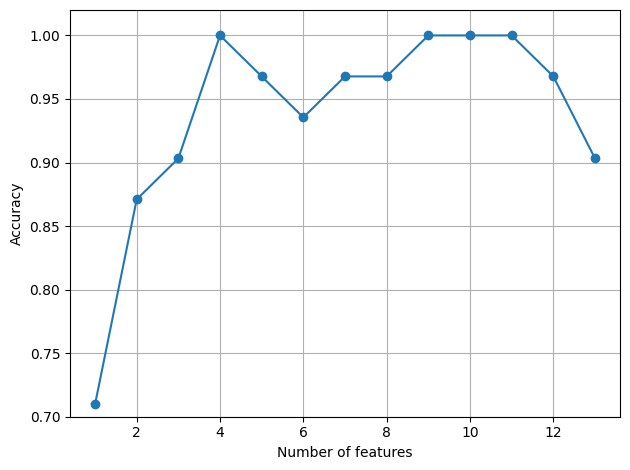

Index(['Malic acid', 'Proanthocyanins', 'Hue', 'proline'], dtype='object')


In [18]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

import SBS

# 모델 생성 및 SBS 실행
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS.SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# 선택된 특성에 대한 성능 출력
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

k4 = list(sbs.subsets_[9])
print(df_wine.columns[1:][k4])

In [19]:
knn.fit(X_train_std, y_train)
print('훈련 정확도', knn.score(X_train_std, y_train))
print('테스트 정확도', knn.score(X_test_std, y_test))

knn.fit(X_train_std[:, k4], y_train)
print('훈련 정확도', knn.score(X_train_std[:, k4], y_train))
print('테스트 정확도', knn.score(X_test_std[:, k4], y_test))

훈련 정확도 0.967479674796748
테스트 정확도 0.9629629629629629
훈련 정확도 0.967479674796748
테스트 정확도 0.9074074074074074
